# Módulo Nº 2 
## Calculo Avanzado-MAT1189-1-2021-1
## Proyecto Abril "optimización"
### Integrantes: Enrique Cayupan, Bryan Silva, Dennis Riffo.




El modelo que elegimos para realizar la optimizacion es el Weibull, que se define mediante la siguiente funcion:

$u(t)=1-e^{-at}$

Posteriormente el resultado de nuestro modelo lo reemplazaremos en la funcion de costo que se define por:

$f(p)=\sum_{i=1}^{n}(y(p;x_i)-\hat{y}_i)^2$

Para graficar nuestro modelo en Python ocupamos los modulos de numpy y matplotlib

In [23]:
import numpy as np
import matplotlib.pyplot as plt

Los modulos que utilizaremos para la representacion 3D son los siguientes

In [24]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

Nuestra variables estaran definidas de manera secuencial en el caso del tiempo, el cual partira con el valor  
0.1 hasta 1.0 con paso 0.1. Y los valores de entrada estaran definidos en un arreglo de 10 elementos,  
los cuales asignamos manualmente para alcanzar los resultados propuestos segun la ilustracion de la tabla presente 
en el documento 'guion'.

In [25]:
t = np.linspace(0.1, 1, 10)
a = 2.0

Definiremos el modelo a modo de funcion con los parametros que necesitaremos para
que esta retorne el resultado de la funcion Weibull.

In [26]:
def Weibull(t,a):
    func = 1-np.exp(-(a*t))
    return func

Luego para graficar utilizamos plot y en sus parametros llamamos a la funcion del modelo de Weibull que se definio anteriormente.

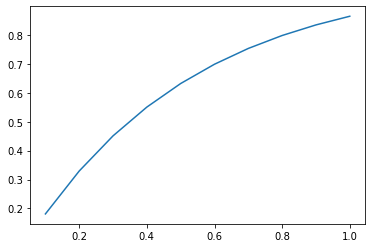

In [27]:
plt.plot(t,Weibull(t,a))

Como resultado, llamamos nuevamente la funcion, para mostrar los valores que obtendremos y 
utilizaremos en el eje Y de la representacion grafica de nuestro modelo cuadratico

In [28]:
print(Weibull(t,a))

[0.18126925 0.32967995 0.45118836 0.55067104 0.63212056 0.69880579
 0.75340304 0.79810348 0.83470111 0.86466472]


Se define la funcion Rosenbrock para su posterior implementacion con nuestro modelo

In [29]:
f = lambda x,y: (x-1)**2 + 100*(y-x**2)**2;

Iniciamos nuestra figura definiendo el tamaño y el tipo de proyección

Para la representación de la función de Rosenbrock como no lineal,  implementamos nuestros datos conseguidos por nuestro modelo cuadrático en representación de los ejes (X,Y) de la función de Rosenbrock.

In [31]:
# Evaluar la funcion
X = np.arange(0, 1, 0.1)
Y = np.array(Weibull(t,a))
X, Y = np.meshgrid(X, Y)
Z = f(X,Y)

Las siguientes lineas de codigo es simplemente para para mostrar el plot de nuestra funcion 
y ajustar los ejes de la imagen.

In [32]:
surf = axRos.plot_surface(X, Y, Z, cmap=cm.gist_heat_r,
                       linewidth=0, antialiased=False)
axRos.set_zlim(0, 100)
figRos.colorbar(surf, shrink=0.5, aspect=10)
plt.show() 